In [10]:
import pandas as pd
from scipy.stats import wilcoxon

# Load the first Excel sheet containing the 'Latency_new' data with 'Condition'
# Replace 'latency_file.xlsx' with the correct path to your first Excel file
latency_file =r'C:\Maha\DATA\behaviour_analysis\latency_data_500ms_1.xlsx'
latency_data = pd.read_excel(latency_file)

# Calculate the median latency for each Well_ID and Condition from the 'Latency_new' column
median_latency_df = latency_data.groupby(['Well_ID', 'Condition'])['Latency_new'].median().reset_index()
median_latency_df = median_latency_df.rename(columns={'Latency_new': 'median_latency'})

# Load the second Excel sheet containing the 'IBI' data with 'Condition'
# Replace 'ibi_file.xlsx' with the correct path to your second Excel file
ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\1s.xlsx'
ibi_data = pd.read_excel(ibi_file)

# Filter the IBI data to include only IBI values < 24000 and calculate the median IBI for each Well_ID and Condition
median_ibi_df = ibi_data[ibi_data['IBI'] < 24000].groupby(['Well_ID', 'Condition'])['IBI'].median().reset_index()
median_ibi_df = median_ibi_df.rename(columns={'IBI': 'median_IBI'})

# Merge the median latency and median IBI data based on Well_ID and Condition
merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# Function to perform Wilcoxon Signed-Rank Test for each condition
def wilcoxon_test_per_condition(merged_data, condition):
    # Filter the data by condition
    condition_data = merged_data[merged_data['Condition'] == condition]
    
    # Drop any rows where either median_latency or median_IBI is NaN
    paired_data = condition_data.dropna(subset=['median_latency', 'median_IBI'])
    
    # Perform Wilcoxon Signed-Rank Test with 'greater' alternative hypothesis (to test if latency > IBI)
    if len(paired_data) > 0:  # Ensure there's enough data
        stat, p_value = wilcoxon(paired_data['median_latency'], paired_data['median_IBI'], alternative='greater')
        
        # Display the results
        print(f"\nWilcoxon Signed-Rank Test for {condition}:")
        print(f"Statistic = {stat}, p-value = {p_value}")
        
        # Interpretation of the p-value
        if p_value < 0.05:
            print(f"Latency values are significantly higher than IBI values for {condition}.")
        else:
            print(f"Latency values are not significantly higher than IBI values for {condition}.")
    else:
        print(f"Not enough data to perform Wilcoxon Signed-Rank Test for {condition}.")

# Perform Wilcoxon Signed-Rank Test for Opsin and Non-Opsin conditions separately
wilcoxon_test_per_condition(merged_data, 'opsin')
wilcoxon_test_per_condition(merged_data, 'non opsin')

# Display the merged DataFrame for review
print(merged_data)


Wilcoxon Signed-Rank Test for opsin:
Statistic = 130.0, p-value = 0.000213623046875
Latency values are significantly higher than IBI values for opsin.

Wilcoxon Signed-Rank Test for non opsin:
Statistic = 88.0, p-value = 0.060272216796875
Latency values are not significantly higher than IBI values for non opsin.
    Well_ID  Condition  median_latency  median_IBI
0         0      opsin         174.930       1.435
1         1      opsin          21.620       1.375
2         2      opsin          94.485       0.630
3         3      opsin          55.655       1.450
4         4      opsin          11.570       2.495
5         5      opsin          63.205       2.140
6         6      opsin           0.160       3.980
7         7      opsin         126.540       1.565
8         8      opsin          33.795       0.810
9         9      opsin           0.150       0.880
10       10      opsin           9.655      10.395
11       11      opsin         165.515       2.080
12       12      opsin

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import sem, wilcoxon

# Load the latency data
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_500ms_1.xlsx'
latency_data = pd.read_excel(latency_file)

# Calculate the median latency for each Well_ID and Condition from the 'Latency_new' column
median_latency_df = latency_data.groupby(['Well_ID', 'Condition'])['Latency_new'].median().reset_index()
median_latency_df = median_latency_df.rename(columns={'Latency_new': 'median_latency'})

# Load the IBI data
ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\500ms.xlsx'
ibi_data = pd.read_excel(ibi_file)

# Filter the IBI data to include only IBI values < 24000 and calculate the median IBI for each Well_ID and Condition
median_ibi_df = ibi_data[ibi_data['IBI'] < 24000].groupby(['Well_ID', 'Condition'])['IBI'].median().reset_index()
median_ibi_df = median_ibi_df.rename(columns={'IBI': 'median_IBI'})

# Merge the median latency and median IBI data based on Well_ID and Condition
merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# Function to calculate and display summary statistics
def display_summary_statistics(data, column_name):
    print(f"\nSummary Statistics for {column_name}:")
    print(f"Mean: {data[column_name].mean()}")
    print(f"Median: {data[column_name].median()}")
    print(f"Standard Deviation: {data[column_name].std()}")
    print(f"Standard Error of Mean (SEM): {sem(data[column_name].dropna())}")

# Display summary statistics for median_latency and median_IBI
display_summary_statistics(merged_data, 'median_latency')
display_summary_statistics(merged_data, 'median_IBI')

# Function to perform Wilcoxon Signed-Rank Test for each condition
def wilcoxon_test_per_condition(merged_data, condition):
    # Filter the data by condition
    condition_data = merged_data[merged_data['Condition'] == condition]
    
    # Drop any rows where either median_latency or median_IBI is NaN
    paired_data = condition_data.dropna(subset=['median_latency', 'median_IBI'])
    
    # Perform Wilcoxon Signed-Rank Test with 'greater' alternative hypothesis (to test if latency > IBI)
    if len(paired_data) > 0:  # Ensure there's enough data
        stat, p_value = wilcoxon(paired_data['median_latency'], paired_data['median_IBI'], alternative='greater')
        
        # Display the results
        print(f"\nWilcoxon Signed-Rank Test for {condition}:")
        print(f"Statistic = {stat}, p-value = {p_value}")
        
        # Interpretation of the p-value
        if p_value < 0.05:
            print(f"Latency values are significantly higher than IBI values for {condition}.")
        else:
            print(f"Latency values are not significantly higher than IBI values for {condition}.")
    else:
        print(f"Not enough data to perform Wilcoxon Signed-Rank Test for {condition}.")

# Perform Wilcoxon Signed-Rank Test for Opsin and Non-Opsin conditions separately
wilcoxon_test_per_condition(merged_data, 'opsin')
wilcoxon_test_per_condition(merged_data, 'non opsin')

# Display the merged DataFrame for review
print(merged_data)



Summary Statistics for median_latency:
Mean: 10.53796875
Median: 2.885
Standard Deviation: 13.835017683014161
Standard Error of Mean (SEM): 2.4457087053737774

Summary Statistics for median_IBI:
Mean: 2.194375
Median: 1.445
Standard Deviation: 1.8571174116477291
Standard Error of Mean (SEM): 0.32829507880892955

Wilcoxon Signed-Rank Test for opsin:
Statistic = 101.0, p-value = 0.046722412109375
Latency values are significantly higher than IBI values for opsin.

Wilcoxon Signed-Rank Test for non opsin:
Statistic = 120.0, p-value = 0.0025787353515625
Latency values are significantly higher than IBI values for non opsin.
    Well_ID  Condition  median_latency  median_IBI
0         0      opsin           0.740       0.460
1         1      opsin          19.765       1.150
2         2      opsin          12.810       1.840
3         3      opsin          27.675       3.635
4         4      opsin           9.105       3.515
5         5      opsin          42.955       3.590
6         6     

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

# --- Load data ---
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_250ms_1.xlsx'
latency_data = pd.read_excel(latency_file)

ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\250ms.xlsx'
ibi_data = pd.read_excel(ibi_file)

# --- Compute medians by Well_ID × Condition as you had ---
median_latency_df = (
    latency_data
    .groupby(['Well_ID', 'Condition'], as_index=False)['Latency_new']
    .median()
    .rename(columns={'Latency_new': 'median_latency'})
)

median_ibi_df = (
    ibi_data.loc[ibi_data['IBI'] < 24000]
    .groupby(['Well_ID', 'Condition'], as_index=False)['IBI']
    .median()
    .rename(columns={'IBI': 'median_IBI'})
)

merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# --- Helpers: median + IQR ---
def iqr(series: pd.Series):
    q1 = series.quantile(0.25, interpolation="midpoint")
    q3 = series.quantile(0.75, interpolation="midpoint")
    return q1, q3, q3 - q1

def summarize(series: pd.Series):
    series = pd.to_numeric(series, errors='coerce').dropna()
    if series.empty:
        return pd.Series({"median": np.nan, "q1": np.nan, "q3": np.nan, "IQR": np.nan, "n": 0})
    q1, q3, iqr_val = iqr(series)
    return pd.Series({
        "median": series.median(),
        "q1": q1,
        "q3": q3,
        "IQR": iqr_val,
        "n": series.size
    })

def print_summary_table(df, column, by=None, title=None):
    if title:
        print(f"\n=== {title} ===")
    if by is None:
        s = summarize(df[column])
        print(f"{column}: median={s['median']:.3g}  IQR=[{s['q1']:.3g}, {s['q3']:.3g}]  (n={int(s['n'])})")
        return s
    else:
        # Robust per-group summary without pivot_table/apply
        out = (
            df.groupby(by)[column]
              .agg(
                  median='median',
                  q1=lambda x: pd.to_numeric(x, errors='coerce').dropna().quantile(0.25, interpolation="midpoint"),
                  q3=lambda x: pd.to_numeric(x, errors='coerce').dropna().quantile(0.75, interpolation="midpoint"),
                  n='count'
              )
        )
        out['IQR'] = out['q3'] - out['q1']

        # Pretty print
        for idx, row in out.iterrows():
            print(f"{column} | {by}={idx}: median={row['median']:.3g}  IQR=[{row['q1']:.3g}, {row['q3']:.3g}]  (n={int(row['n'])})")
        return out

# --- Show summaries: overall + per condition ---
print_summary_table(merged_data, 'median_latency', title="Overall summary (median & IQR)")
print_summary_table(merged_data, 'median_IBI')

print_summary_table(merged_data, 'median_latency', by='Condition', title="Per-condition summary (median & IQR)")
print_summary_table(merged_data, 'median_IBI', by='Condition')

# --- Wilcoxon Signed-Rank per condition (latency > IBI) ---
def wilcoxon_test_per_condition(merged_df, condition):
    subset = merged_df.loc[merged_df['Condition'].str.lower() == condition.lower(), ['median_latency', 'median_IBI']].dropna()
    if len(subset) < 1:
        print(f"\nWilcoxon for {condition}: not enough paired data.")
        return
    # If many ties/zeros, consider zero_method="pratt" explicitly
    stat, pval = wilcoxon(subset['median_latency'], subset['median_IBI'], alternative='greater', zero_method="wilcox")
    print(f"\nWilcoxon Signed-Rank (latency > IBI) for {condition}:")
    print(f"n={len(subset)}, statistic={stat}, p-value={pval:.4g}")
    if pval < 0.05:
        print("Result: latency is significantly higher than IBI.")
    else:
        print("Result: latency is NOT significantly higher than IBI.")

wilcoxon_test_per_condition(merged_data, 'opsin')
wilcoxon_test_per_condition(merged_data, 'non opsin')

# Optional: inspect merged rows
# print("\nMerged data (first 10 rows):")
# print(merged_data.head(10))



=== Overall summary (median & IQR) ===
median_latency: median=8.87  IQR=[2.25, 16.1]  (n=31)
median_IBI: median=1.62  IQR=[1.22, 3.75]  (n=31)

=== Per-condition summary (median & IQR) ===
median_latency | Condition=non opsin: median=8.87  IQR=[3.38, 13.8]  (n=15)
median_latency | Condition=opsin: median=5.88  IQR=[0.158, 21.4]  (n=16)
median_IBI | Condition=non opsin: median=1.61  IQR=[1.19, 6.72]  (n=15)
median_IBI | Condition=opsin: median=1.67  IQR=[1.23, 2.65]  (n=16)

Wilcoxon Signed-Rank (latency > IBI) for opsin:
n=16, statistic=100.0, p-value=0.05229
Result: latency is NOT significantly higher than IBI.

Wilcoxon Signed-Rank (latency > IBI) for non opsin:
n=15, statistic=115.0, p-value=0.0003052
Result: latency is significantly higher than IBI.


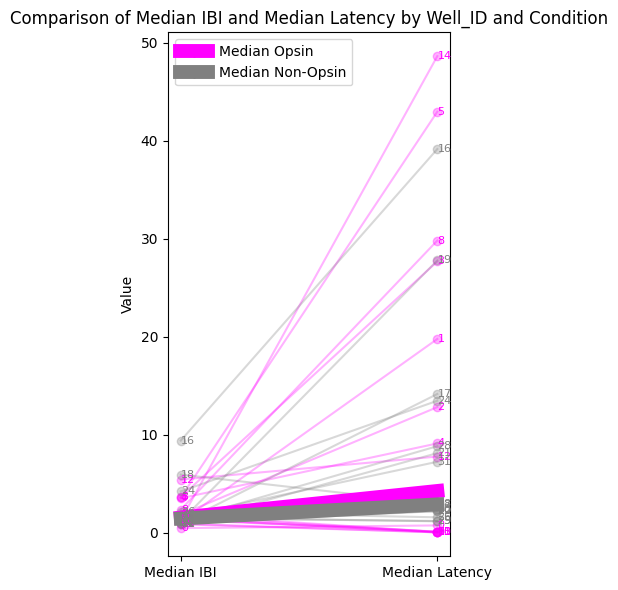

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon

# Load the first Excel sheet containing the 'Latency_new' data with 'Condition'
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_500ms_1.xlsx'
latency_data = pd.read_excel(latency_file)

# Calculate the median latency for each Well_ID and Condition from the 'Latency_new' column
median_latency_df = latency_data.groupby(['Well_ID', 'Condition'])['Latency_new'].median().reset_index()
median_latency_df = median_latency_df.rename(columns={'Latency_new': 'median_latency'})

# Load the second Excel sheet containing the 'IBI' data with 'Condition'
ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\500ms.xlsx'
ibi_data = pd.read_excel(ibi_file)

# Filter the IBI data to include only IBI values < 24000 and calculate the median IBI for each Well_ID and Condition
median_ibi_df = ibi_data[ibi_data['IBI'] < 24000].groupby(['Well_ID', 'Condition'])['IBI'].median().reset_index()
median_ibi_df = median_ibi_df.rename(columns={'IBI': 'median_IBI'})

# Merge the median latency and median IBI data based on Well_ID and Condition
merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# Plot scatter plot with lines connecting median IBI and median latency
plt.figure(figsize=(4, 6))

# Color mapping for conditions
colors = {'opsin': 'magenta', 'non opsin': 'grey'}

# Loop through each row in the merged data and plot the points and connecting lines with lesser alpha
for idx, row in merged_data.iterrows():
    color = colors[row['Condition']]
    # Plot the lines with reduced alpha
    plt.plot([1, 2], [row['median_IBI'], row['median_latency']], color=color, marker='o', alpha=0.3)
    # Add text labels for Well_ID
    plt.text(1, row['median_IBI'], f"{row['Well_ID']}", fontsize=8, color=color, va='center')
    plt.text(2, row['median_latency'], f"{row['Well_ID']}", fontsize=8, color=color, va='center')

# Calculate overall median values by condition (Opsin and Non-Opsin)
median_ibi_opsin = np.median(merged_data[merged_data['Condition'] == 'opsin']['median_IBI'])
median_latency_opsin = np.median(merged_data[merged_data['Condition'] == 'opsin']['median_latency'])
median_ibi_non_opsin = np.median(merged_data[merged_data['Condition'] == 'non opsin']['median_IBI'])
median_latency_non_opsin = np.median(merged_data[merged_data['Condition'] == 'non opsin']['median_latency'])

# Plot the median lines for Opsin (magenta) and Non-Opsin (grey) with thicker lines
plt.plot([1, 2], [median_ibi_opsin, median_latency_opsin], color='magenta', lw=10, marker='D', label='Median Opsin')
plt.plot([1, 2], [median_ibi_non_opsin, median_latency_non_opsin], color='grey', lw=10, marker='D', label='Median Non-Opsin')

# Set labels and title
plt.xticks([1, 2], ['Median IBI', 'Median Latency'])
plt.ylabel('Value')
plt.title('Comparison of Median IBI and Median Latency by Well_ID and Condition')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# pre post median

Stim Duration: 1s, Condition: opsin - Wilcoxon Test Stat: 7.0, P-value: 0.000580
Stim Duration: 1s, Condition: non opsin - Wilcoxon Test Stat: 16.0, P-value: 0.010254
Stim Duration: 250ms, Condition: opsin - Wilcoxon Test Stat: 44.0, P-value: 0.231201
Stim Duration: 250ms, Condition: non opsin - Wilcoxon Test Stat: 41.0, P-value: 0.280531
Stim Duration: 3s, Condition: opsin - Wilcoxon Test Stat: 1.0, P-value: 0.000061
Stim Duration: 3s, Condition: non opsin - Wilcoxon Test Stat: 15.0, P-value: 0.004181
Stim Duration: 500ms, Condition: opsin - Wilcoxon Test Stat: 21.0, P-value: 0.013092
Stim Duration: 500ms, Condition: non opsin - Wilcoxon Test Stat: 29.0, P-value: 0.044312


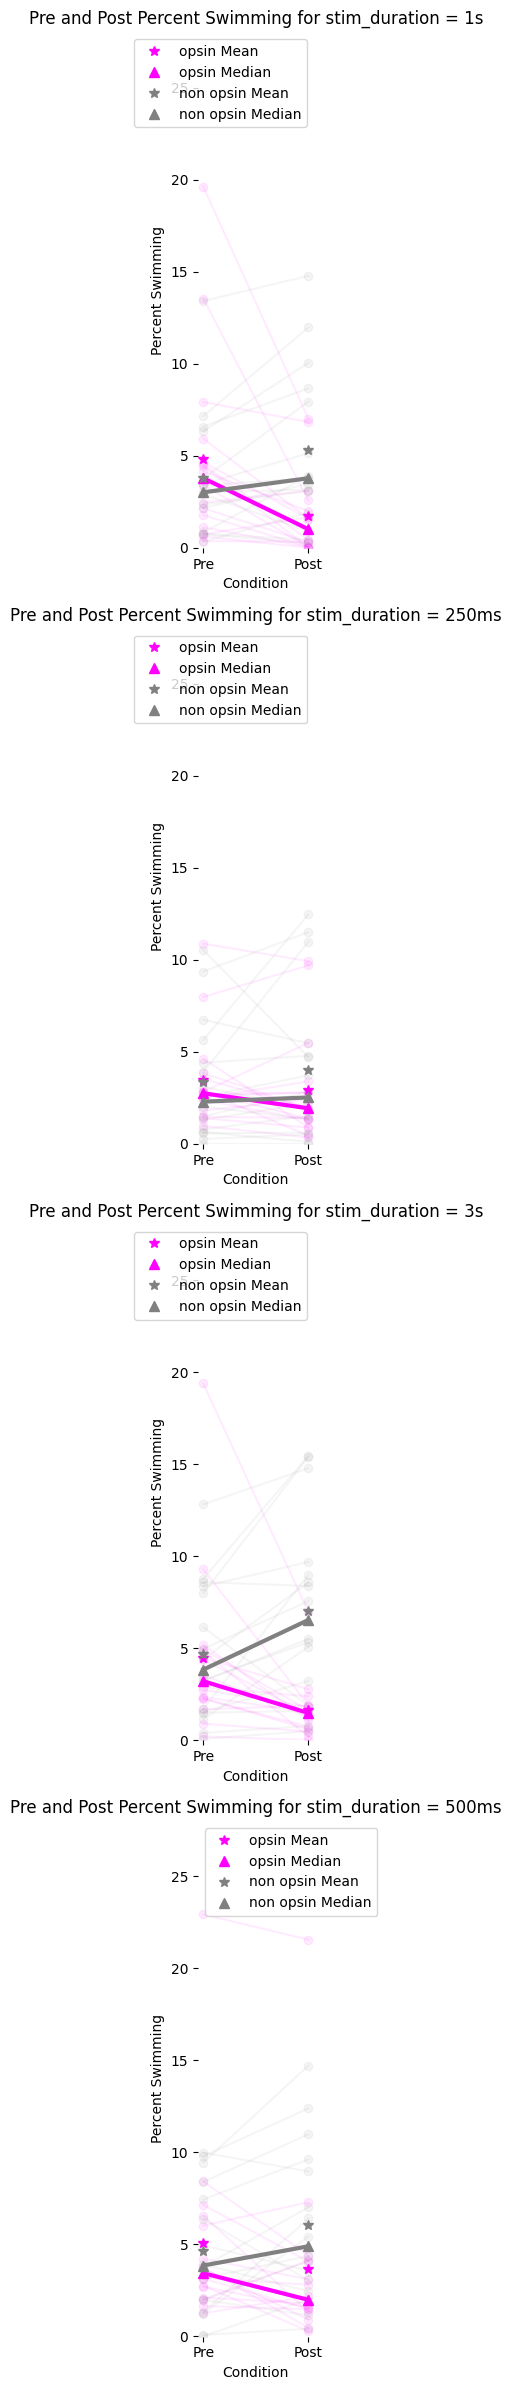


Wilcoxon Test Results Summary:
Stim Duration: 1s, Condition: opsin - Stat: 7.0, P-value: 0.000580
Stim Duration: 1s, Condition: non opsin - Stat: 16.0, P-value: 0.010254
Stim Duration: 250ms, Condition: opsin - Stat: 44.0, P-value: 0.231201
Stim Duration: 250ms, Condition: non opsin - Stat: 41.0, P-value: 0.280531
Stim Duration: 3s, Condition: opsin - Stat: 1.0, P-value: 0.000061
Stim Duration: 3s, Condition: non opsin - Stat: 15.0, P-value: 0.004181
Stim Duration: 500ms, Condition: opsin - Stat: 21.0, P-value: 0.013092
Stim Duration: 500ms, Condition: non opsin - Stat: 29.0, P-value: 0.044312


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

# Load the Excel file
file_path = r'C:\Maha\DATA\behaviour_analysis\181122\combined_percent_swimming.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Compute the median for each Well_ID and stim_duration for pre and post percent swimming
results_df = data.groupby(['Well_ID', 'stim_duration', 'Condition']).agg(
    pre_percent_swimming=('pre_percent_swimming', 'median'),
    post_percent_swimming=('post_percent_swimming', 'median')
).reset_index()

# Define colors and alpha for the conditions
color_mapping = {'opsin': 'magenta', 'non opsin': 'grey'}
alpha_value_lines = 0.08
alpha_value_dots = 0.3

# Get the unique stim_durations
stim_durations = results_df['stim_duration'].unique()

# Create subplots for each stim_duration
fig, axes = plt.subplots(nrows=len(stim_durations), figsize=(2, len(stim_durations) * 6))

# Dictionary to store Wilcoxon results
wilcoxon_results = {}

for i, stim_duration in enumerate(stim_durations):
    ax = axes[i] if len(stim_durations) > 1 else axes  # Handle cases with only one subplot
    
    # Filter the results for the current stim_duration
    subset_df = results_df[results_df['stim_duration'] == stim_duration]
    
    # Plot lines connecting pre and post swimming percentages for each Well_ID
    for condition, color in color_mapping.items():
        subset = subset_df[subset_df['Condition'] == condition]
        for _, row in subset.iterrows():
            ax.plot([0.5, 1], [row['pre_percent_swimming'], row['post_percent_swimming']],
                    marker='o', color=color, alpha=alpha_value_lines)
    
    # Plot mean and median for each condition
    for condition, color in color_mapping.items():
        subset = subset_df[subset_df['Condition'] == condition]
        
        # Calculate and plot mean values
        pre_mean = subset['pre_percent_swimming'].mean()
        post_mean = subset['post_percent_swimming'].mean()
        ax.plot([0.5, 1], [pre_mean, post_mean], marker='*', color=color, markersize=7, linestyle='None', label=f'{condition} Mean')
        
        # Calculate and plot median values
        pre_median = subset['pre_percent_swimming'].median()
        post_median = subset['post_percent_swimming'].median()
        ax.plot([0.5, 1], [pre_median, post_median], marker='^', color=color, markersize=7, linestyle='None', label=f'{condition} Median')
        
        # Draw a line connecting the median values
        ax.plot([0.5, 1], [pre_median, post_median], color=color, linewidth=3)
    
    # Perform Wilcoxon Signed-Rank Test for pre vs post for each condition
    for condition in color_mapping.keys():
        condition_subset = subset_df[subset_df['Condition'] == condition]
        
        if len(condition_subset) > 1:  # Ensure there's enough data for the test
            pre_values = condition_subset['pre_percent_swimming']
            post_values = condition_subset['post_percent_swimming']
            
            # Wilcoxon Signed-Rank Test
            stat, p_value = wilcoxon(pre_values, post_values)
            wilcoxon_results[(stim_duration, condition)] = (stat, p_value)
            
            # Print Wilcoxon test results for each condition
            print(f"Stim Duration: {stim_duration}, Condition: {condition} - Wilcoxon Test Stat: {stat}, P-value: {p_value:.6f}")
        else:
            print(f"Not enough data for Wilcoxon test in Stim Duration: {stim_duration}, Condition: {condition}")
    
    # Customize each subplot
    ax.set_xticks([0.5, 1])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_xlabel('Condition')
    ax.set_ylabel('Percent Swimming')
    ax.set_title(f'Pre and Post Percent Swimming for stim_duration = {stim_duration}')
    ax.set_ylim(-0.02, 28)
    
    # Turn off the visibility of the spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add a legend to each subplot
    ax.legend()

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Save the figure as an SVG file
#plt.savefig(r"C:\Maha\DATA\behaviour_analysis\figures_newpre_post_percent_swimming.svg", format='svg')
# Show the plot
plt.show()

# Wilcoxon results stored in the dictionary
print("\nWilcoxon Test Results Summary:")
for key, result in wilcoxon_results.items():
    stim_duration, condition = key
    stat, p_value = result
    print(f"Stim Duration: {stim_duration}, Condition: {condition} - Stat: {stat}, P-value: {p_value:.6f}")


250ms, opsin — Wilcoxon: stat=44, p=0.231201
250ms, non opsin — Wilcoxon: stat=41, p=0.280531
500ms, opsin — Wilcoxon: stat=21, p=0.013092
500ms, non opsin — Wilcoxon: stat=29, p=0.044312
1s, opsin — Wilcoxon: stat=7, p=0.000580
1s, non opsin — Wilcoxon: stat=16, p=0.010254
3s, opsin — Wilcoxon: stat=1, p=0.000061
3s, non opsin — Wilcoxon: stat=15, p=0.004181
Saved SVG to: C:\Maha\DATA\behaviour_analysis\figures_new\pre_post_percent_swimming_side_by_side_ordered.svg


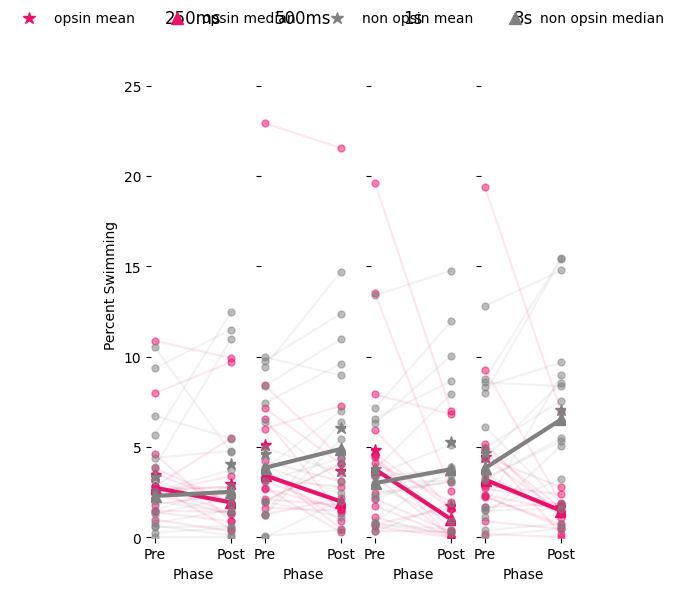


Wilcoxon Test Results Summary:
250ms, opsin: stat=44, p=0.231201
250ms, non opsin: stat=41, p=0.280531
500ms, opsin: stat=21, p=0.013092
500ms, non opsin: stat=29, p=0.044312
1s, opsin: stat=7, p=0.000580
1s, non opsin: stat=16, p=0.010254
3s, opsin: stat=1, p=0.000061
3s, non opsin: stat=15, p=0.004181


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import numpy as np

# Load the Excel file
file_path = r'C:\Maha\DATA\behaviour_analysis\181122\combined_percent_swimming.xlsx'
data = pd.read_excel(file_path)

# Compute the median for each Well_ID × stim_duration × Condition for pre/post
results_df = (
    data.groupby(['Well_ID', 'stim_duration', 'Condition'], as_index=False)
        .agg(pre_percent_swimming=('pre_percent_swimming', 'median'),
             post_percent_swimming=('post_percent_swimming', 'median'))
)

# -------------------- enforce plotting order --------------------
# We’ll create a robust string label column 'stim_label' and plot by this.
DESIRED_ORDER = ['250ms', '500ms', '1s', '3s']

def to_label(v):
    """Map stim_duration values to one of '250ms','500ms','1s','3s' when possible."""
    s = str(v).strip().lower()
    # string paths
    if s.endswith('ms'):
        try:
            ms = float(s.replace('ms',''))
            if abs(ms-250) < 50:  return '250ms'
            if abs(ms-500) < 50:  return '500ms'
            if abs(ms-1000)< 100: return '1s'
            if abs(ms-3000)< 200: return '3s'
            return f'{int(round(ms))}ms'
        except:
            return s
    if s.endswith('s'):
        try:
            sec = float(s.replace('s',''))
            if abs(sec-0.25) < 0.05: return '250ms'
            if abs(sec-0.5)  < 0.05: return '500ms'
            if abs(sec-1.0)  < 0.05: return '1s'
            if abs(sec-3.0)  < 0.1:  return '3s'
            return f'{sec:g}s'
        except:
            return s
    # numeric paths
    try:
        x = float(s)
        # if big numbers, treat as ms
        if x >= 10:
            if abs(x-250)  < 50:  return '250ms'
            if abs(x-500)  < 50:  return '500ms'
            if abs(x-1000) < 100: return '1s'
            if abs(x-3000) < 200: return '3s'
            return f'{int(round(x))}ms'
        # else treat as seconds
        if abs(x-0.25) < 0.05: return '250ms'
        if abs(x-0.5)  < 0.05: return '500ms'
        if abs(x-1.0)  < 0.05: return '1s'
        if abs(x-3.0)  < 0.1:  return '3s'
        return f'{x:g}s'
    except:
        return s

results_df['stim_label'] = results_df['stim_duration'].apply(to_label)

# only keep labels that are present, in the desired order
labels_present = [lab for lab in DESIRED_ORDER if lab in results_df['stim_label'].unique()]
if not labels_present:
    raise SystemExit("None of the desired stim durations (250ms, 500ms, 1s, 3s) found in data.")

# Make stim_label an ordered categorical
results_df['stim_label'] = pd.Categorical(results_df['stim_label'], categories=labels_present, ordered=True)
# ---------------------------------------------------------------

# Colors (opsin now #ea116a)
color_mapping = {'opsin': '#ea116a', 'non opsin': 'grey'}
alpha_value_lines = 0.1
alpha_value_dots = 0.50

# ---- make 1×N layout in the specified order ----
n = len(labels_present)
fig, axes = plt.subplots(
    nrows=1, ncols=n, figsize=(1.2 * n, 5.8),
    sharey=True, constrained_layout=True
)
if n == 1:
    axes = [axes]  # make iterable

# Store Wilcoxon results
wilcoxon_results = {}

for i, stim_label in enumerate(labels_present):
    ax = axes[i]
    subset_df = results_df[results_df['stim_label'] == stim_label]

    # Per-well lines & points for each condition
    for condition, color in color_mapping.items():
        sub = subset_df[subset_df['Condition'] == condition]
        for _, row in sub.iterrows():
            # connect pre→post per well
            ax.plot([0, 1],
                    [row['pre_percent_swimming'], row['post_percent_swimming']],
                    color=color, alpha=alpha_value_lines, linewidth=1.5)
            # endpoints
            ax.plot([0, 1],
                    [row['pre_percent_swimming'], row['post_percent_swimming']],
                    marker='o', linestyle='None', color=color, alpha=alpha_value_dots, markersize=5)

        # mean (★) & median (▲) markers, plus thick median line
        if not sub.empty:
            pre_mean  = sub['pre_percent_swimming'].mean()
            post_mean = sub['post_percent_swimming'].mean()
            pre_med   = sub['pre_percent_swimming'].median()
            post_med  = sub['post_percent_swimming'].median()

            # mean stars
            ax.plot([0, 1], [pre_mean, post_mean], marker='*', linestyle='None',
                    color=color, markersize=9, label=f'{condition} mean')

            # median triangles + thick line joining medians
            ax.plot([0, 1], [pre_med, post_med], marker='^', linestyle='None',
                    color=color, markersize=8, label=f'{condition} median')
            ax.plot([0, 1], [pre_med, post_med], color=color, linewidth=3)

    # Wilcoxon pre vs post per condition (paired across wells)
    for condition in color_mapping.keys():
        sub = subset_df[subset_df['Condition'] == condition].dropna(
            subset=['pre_percent_swimming', 'post_percent_swimming']
        )
        if len(sub) > 1:
            stat, p_value = wilcoxon(sub['pre_percent_swimming'], sub['post_percent_swimming'])
            wilcoxon_results[(stim_label, condition)] = (stat, p_value)
            print(f"{stim_label}, {condition} — Wilcoxon: stat={stat:.3g}, p={p_value:.6f}")
        else:
            print(f"{stim_label}, {condition} — not enough pairs for Wilcoxon.")

    # Cosmetics for this subplot
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_xlabel('Phase')
    if i == 0:
        ax.set_ylabel('Percent Swimming')
    ax.set_title(stim_label)
    ax.set_ylim(-0.02, 28)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Single legend (deduplicate labels)
handles, labels = axes[-1].get_legend_handles_labels()
dedup = dict(zip(labels, handles))
fig.legend(dedup.values(), dedup.keys(), loc='upper center', ncols=4, frameon=False)

# Save SVG (side-by-side panels in the requested order)
save_path = r"C:\Maha\DATA\behaviour_analysis\figures_new\pre_post_percent_swimming_side_by_side_ordered.svg"
plt.savefig(save_path, format='svg')
print("Saved SVG to:", save_path)

plt.show()

# Summary of Wilcoxon results
print("\nWilcoxon Test Results Summary:")
for (stim, cond), (stat, p) in wilcoxon_results.items():
    print(f"{stim}, {cond}: stat={stat:.3g}, p={p:.6f}")


In [9]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = r'C:\Maha\DATA\behaviour_analysis\181122\combined_percent_swimming.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Compute the statistics for each Well_ID and stim_duration for pre and post percent swimming
results_df = data.groupby(['stim_duration','Condition']).agg(
    pre_mean=('pre_percent_swimming', 'mean'),
    pre_median=('pre_percent_swimming', 'median'),
    pre_std=('pre_percent_swimming', 'std'),
    pre_sem=('pre_percent_swimming', lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
    post_mean=('post_percent_swimming', 'mean'),
    post_median=('post_percent_swimming', 'median'),
    post_std=('post_percent_swimming', 'std'),
    post_sem=('post_percent_swimming', lambda x: np.std(x, ddof=1) / np.sqrt(len(x))),
).reset_index()

# Print the results
print(results_df)


  stim_duration  Condition  pre_mean  pre_median   pre_std   pre_sem  \
0            1s  non opsin  4.184861    3.250000  4.367115  0.563792   
1            1s      opsin  4.562500    3.158333  5.267646  0.658456   
2         250ms  non opsin  3.454036    2.562500  3.849878  0.481235   
3         250ms      opsin  3.544401    3.016667  3.452448  0.431556   
4            3s  non opsin  4.953516    3.625000  4.867452  0.608432   
5            3s      opsin  4.567708    2.741667  4.780163  0.597520   
6         500ms  non opsin  4.704427    3.970833  3.867217  0.483402   
7         500ms      opsin  5.590495    3.650000  5.850979  0.731372   

   post_mean  post_median  post_std  post_sem  
0   5.299583     3.866667  4.749224  0.613122  
1   2.107682     0.825000  3.041515  0.380189  
2   4.057552     2.337500  4.234349  0.529294  
3   3.067708     2.129167  3.160730  0.395091  
4   7.397786     7.308333  5.808443  0.726055  
5   1.834766     1.254167  2.057181  0.257148  
6   6.160417   

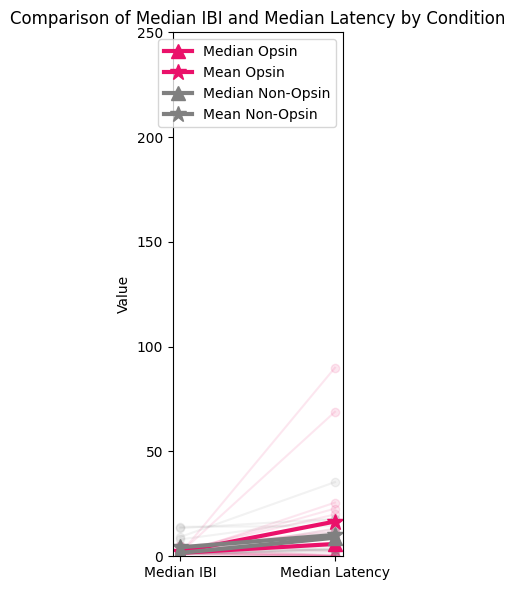

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the first Excel sheet containing the 'Latency_new' data with 'Condition'
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_250ms_1.xlsx'
latency_data = pd.read_excel(latency_file)

# Calculate the median latency for each Well_ID and Condition from the 'Latency_new' column
median_latency_df = latency_data.groupby(['Well_ID', 'Condition'])['Latency_new'].median().reset_index()
median_latency_df = median_latency_df.rename(columns={'Latency_new': 'median_latency'})

# Load the second Excel sheet containing the 'IBI' data with 'Condition'
ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\250ms.xlsx'
ibi_data = pd.read_excel(ibi_file)

# Filter the IBI data to include only IBI values < 24000 and calculate the median IBI for each Well_ID and Condition
median_ibi_df = ibi_data[ibi_data['IBI'] < 24000].groupby(['Well_ID', 'Condition'])['IBI'].median().reset_index()
median_ibi_df = median_ibi_df.rename(columns={'IBI': 'median_IBI'})

# Merge the median latency and median IBI data based on Well_ID and Condition
merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# Plot scatter plot with lines connecting median IBI and median latency
plt.figure(figsize=(3, 6))

# Color mapping for conditions
colors = {'opsin': '#ea116a', 'non opsin': 'grey'}

# Loop through each row in the merged data and plot the points and connecting lines with lesser alpha
for idx, row in merged_data.iterrows():
    color = colors[row['Condition']]
    # Plot the lines with reduced alpha
    plt.plot([1, 2], [row['median_IBI'], row['median_latency']], color=color, marker='o', alpha=0.1)

# Calculate overall median and mean values by condition (Opsin and Non-Opsin)
median_ibi_opsin = np.median(merged_data[merged_data['Condition'] == 'opsin']['median_IBI'])
median_latency_opsin = np.median(merged_data[merged_data['Condition'] == 'opsin']['median_latency'])
mean_ibi_opsin = np.mean(merged_data[merged_data['Condition'] == 'opsin']['median_IBI'])
mean_latency_opsin = np.mean(merged_data[merged_data['Condition'] == 'opsin']['median_latency'])

median_ibi_non_opsin = np.median(merged_data[merged_data['Condition'] == 'non opsin']['median_IBI'])
median_latency_non_opsin = np.median(merged_data[merged_data['Condition'] == 'non opsin']['median_latency'])
mean_ibi_non_opsin = np.mean(merged_data[merged_data['Condition'] == 'non opsin']['median_IBI'])
mean_latency_non_opsin = np.mean(merged_data[merged_data['Condition'] == 'non opsin']['median_latency'])

# Plot the median values as triangles and mean values as stars for Opsin
plt.plot([1, 2], [median_ibi_opsin, median_latency_opsin], color='#ea116a', lw=3, marker='^', markersize=10, label='Median Opsin')
plt.plot([1, 2], [mean_ibi_opsin, mean_latency_opsin], color='#ea116a', lw=3, marker='*', markersize=12, label='Mean Opsin')

# Plot the median values as triangles and mean values as stars for Non-Opsin
plt.plot([1, 2], [median_ibi_non_opsin, median_latency_non_opsin], color='grey', lw=3, marker='^', markersize=10, label='Median Non-Opsin')
plt.plot([1, 2], [mean_ibi_non_opsin, mean_latency_non_opsin], color='grey', lw=3, marker='*', markersize=12, label='Mean Non-Opsin')

# Set labels and title
plt.xticks([1, 2], ['Median IBI', 'Median Latency'])
plt.ylabel('Value')
plt.title('Comparison of Median IBI and Median Latency by Condition')

# Set the y-axis limit
plt.ylim(0, 250)

# Turn off the grid
plt.grid(False)

# Add legend
plt.legend()
# Save the figure as an SVG file
plt.savefig(r"C:\Maha\DATA\behaviour_analysis\arrest_pre_post_250ms.svg", format='svg')

# Show plot
plt.tight_layout()
plt.show()


Dropped 2 pairs where median_latency > 240.0s (kept 30/32).
Saved figure to: C:\Maha\DATA\behaviour_analysis\arrest_pre_post_3s.svg


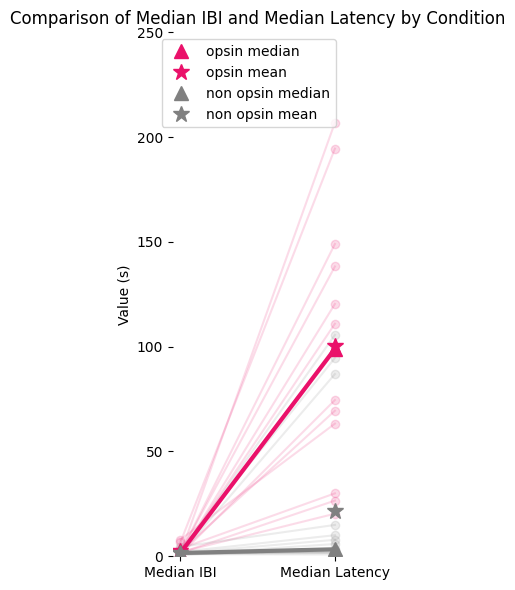

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------- INPUTS -----------
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_3s.xlsx'
ibi_file     = r'C:\Maha\DATA\behaviour_analysis\181122\raw\3s.xlsx'
save_svg     = r"C:\Maha\DATA\behaviour_analysis\arrest_pre_post_3s.svg"

# ----------- LOAD & AGGREGATE -----------
# Median latency per Well_ID × Condition
latency_data = pd.read_excel(latency_file)
median_latency_df = (
    latency_data.groupby(['Well_ID', 'Condition'])['Latency_new']
    .median()
    .reset_index()
    .rename(columns={'Latency_new': 'median_latency'})
)

# Median IBI per Well_ID × Condition (after filtering IBI < 24000)
ibi_data = pd.read_excel(ibi_file)
median_ibi_df = (
    ibi_data[ibi_data['IBI'] < 24000]
    .groupby(['Well_ID', 'Condition'])['IBI']
    .median()
    .reset_index()
    .rename(columns={'IBI': 'median_IBI'})
)

# Merge on Well_ID + Condition
merged_data = pd.merge(median_latency_df, median_ibi_df,
                       on=['Well_ID', 'Condition'], how='inner')

# ----------- FILTER: drop pairs where "post" (latency) > 240 s -----------
THRESH_SEC = 240.0
before_n = len(merged_data)
merged_data = merged_data[merged_data['median_latency'] <= THRESH_SEC].copy()
dropped_n = before_n - len(merged_data)
print(f"Dropped {dropped_n} pairs where median_latency > {THRESH_SEC}s "
      f"(kept {len(merged_data)}/{before_n}).")

# ----------- PLOT -----------
plt.figure(figsize=(3, 6))

colors = {'opsin': '#ea116a', 'non opsin': 'grey'}

# Draw per-pair line from median IBI (x=1) to median latency (x=2)
for _, row in merged_data.iterrows():
    color = colors.get(str(row['Condition']).strip().lower(), 'grey')
    plt.plot([1, 2], [row['median_IBI'], row['median_latency']],
             color=color, marker='o', alpha=0.15)

# Helper to safely compute summary stats
def safe_med(a): 
    return float(np.median(a)) if len(a) else np.nan
def safe_mean(a): 
    return float(np.mean(a)) if len(a) else np.nan

# Compute and plot per-condition mean (star) and median (triangle)
for cond, color in colors.items():
    sub = merged_data[merged_data['Condition'].astype(str).str.strip().str.lower() == cond]
    pre_vals  = sub['median_IBI'].to_numpy(float)
    post_vals = sub['median_latency'].to_numpy(float)

    # medians
    pre_med  = safe_med(pre_vals)
    post_med = safe_med(post_vals)
    # means
    pre_mean  = safe_mean(pre_vals)
    post_mean = safe_mean(post_vals)

    if np.isfinite(pre_med) and np.isfinite(post_med):
        # median (▲) + thick line
        plt.plot([1, 2], [pre_med, post_med], color=color, lw=3)
        plt.plot([1, 2], [pre_med, post_med], marker='^', color=color, linestyle='None', markersize=10, label=f'{cond} median')

    if np.isfinite(pre_mean) and np.isfinite(post_mean):
        # mean (★) markers
        plt.plot([1, 2], [pre_mean, post_mean], marker='*', color=color, linestyle='None', markersize=12, label=f'{cond} mean')

# Axis labels, limits, legend
plt.xticks([1, 2], ['Median IBI', 'Median Latency'])
plt.ylabel('Value (s)')
plt.title('Comparison of Median IBI and Median Latency by Condition')
plt.ylim(0, 250)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.legend()

# Save & show
plt.tight_layout()
plt.savefig(save_svg, format='svg')
print("Saved figure to:", save_svg)
plt.show()


stats

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import sem, wilcoxon

# --- Load latency data ---
latency_file = r'C:\Maha\DATA\behaviour_analysis\latency_data_3s.xlsx'
latency_data = pd.read_excel(latency_file)

# Median latency per Well_ID × Condition
median_latency_df = (
    latency_data
    .groupby(['Well_ID', 'Condition'], as_index=False)['Latency']
    .median()
    .rename(columns={'Latency': 'median_latency'})
)

# --- Load IBI data ---
ibi_file = r'C:\Maha\DATA\behaviour_analysis\181122\raw\3s.xlsx'
ibi_data = pd.read_excel(ibi_file)

# Median IBI per Well_ID × Condition (IBI < 24000)
median_ibi_df = (
    ibi_data.loc[ibi_data['IBI'] < 24000]
    .groupby(['Well_ID', 'Condition'], as_index=False)['IBI']
    .median()
    .rename(columns={'IBI': 'median_IBI'})
)

# --- Merge ---
merged_data = pd.merge(median_latency_df, median_ibi_df, on=['Well_ID', 'Condition'], how='inner')

# --- Summary stats helper (detailed) ---
def compute_summary(series):
    series = pd.to_numeric(series, errors="coerce").dropna()
    if series.empty:
        return pd.Series({
            "mean": np.nan, "median": np.nan, "std": np.nan, "sem": np.nan,
            "q1": np.nan, "q3": np.nan, "IQR": np.nan, "n": 0
        })
    q1 = series.quantile(0.25, interpolation="midpoint")
    q3 = series.quantile(0.75, interpolation="midpoint")
    return pd.Series({
        "mean": series.mean(),
        "median": series.median(),
        "std": series.std(),
        "sem": sem(series),
        "q1": q1,
        "q3": q3,
        "IQR": q3 - q1,
        "n": len(series)
    })

# --- Detailed stats (for sheet 2) ---
summary_latency = merged_data.groupby("Condition")["median_latency"].apply(compute_summary).reset_index()
summary_latency["measure"] = "Latency"

summary_ibi = merged_data.groupby("Condition")["median_IBI"].apply(compute_summary).reset_index()
summary_ibi["measure"] = "IBI"

summary_all = pd.concat([summary_latency, summary_ibi], ignore_index=True)

# --- Wilcoxon tests ---
def wilcoxon_test_per_condition(df, condition):
    subset = df[df["Condition"] == condition].dropna(subset=["median_latency", "median_IBI"])
    if len(subset) < 1:
        return {"Condition": condition, "statistic": np.nan, "p_value": np.nan, "stars": "NA", "n": 0}
    stat, pval = wilcoxon(subset["median_latency"], subset["median_IBI"], alternative="greater")
    # Significance stars
    if pval < 0.001:
        stars = "***"
    elif pval < 0.01:
        stars = "**"
    elif pval < 0.05:
        stars = "*"
    else:
        stars = "ns"
    return {"Condition": condition, "statistic": stat, "p_value": pval, "stars": stars, "n": len(subset)}

wilcoxon_results = pd.DataFrame([
    wilcoxon_test_per_condition(merged_data, cond)
    for cond in merged_data["Condition"].unique()
])

# --- Readable short format for legends (sheet 4, now with std) ---
def short_summary(series, label, decimals=2):
    series = pd.to_numeric(series, errors="coerce").dropna()
    if series.empty:
        return f"{label}: n=0"
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    return (f"{label}: n={len(series)}, "
            f"mean={series.mean():.{decimals}f}, "
            f"median={series.median():.{decimals}f}, "
            f"std={series.std():.{decimals}f}, "
            f"SEM={sem(series):.{decimals}f}, "
            f"IQR={q1:.{decimals}f}–{q3:.{decimals}f}")

readable_rows = []
for cond in merged_data["Condition"].unique():
    subset = merged_data[merged_data["Condition"] == cond]
    row_latency = short_summary(subset["median_latency"], f"{cond} Latency")
    row_ibi = short_summary(subset["median_IBI"], f"{cond} IBI")
    readable_rows.append({"Condition": cond, "Summary": row_latency})
    readable_rows.append({"Condition": cond, "Summary": row_ibi})

readable_summary = pd.DataFrame(readable_rows)

# --- Save to Excel ---
output_file = r"C:\Maha\DATA\behaviour_analysis\arrest_durtion_summary_statistics_3s.xlsx"
with pd.ExcelWriter(output_file) as writer:
    merged_data.to_excel(writer, sheet_name="Merged_Data", index=False)
    summary_all.to_excel(writer, sheet_name="Summary_Stats", index=False)
    wilcoxon_results.to_excel(writer, sheet_name="Wilcoxon_Tests", index=False)
    readable_summary.to_excel(writer, sheet_name="Readable", index=False)

print(f"\nSummary statistics, Wilcoxon tests, and readable summaries saved to:\n{output_file}")



Summary statistics, Wilcoxon tests, and readable summaries saved to:
C:\Maha\DATA\behaviour_analysis\arrest_durtion_summary_statistics_3s.xlsx


250ms, opsin — Wilcoxon: stat=44, p=0.231201
250ms, non opsin — Wilcoxon: stat=41, p=0.280531
500ms, opsin — Wilcoxon: stat=21, p=0.013092
500ms, non opsin — Wilcoxon: stat=29, p=0.044312
1s, opsin — Wilcoxon: stat=7, p=0.000580
1s, non opsin — Wilcoxon: stat=16, p=0.010254
3s, opsin — Wilcoxon: stat=1, p=0.000061
3s, non opsin — Wilcoxon: stat=15, p=0.004181
Saved SVG to: C:\Maha\DATA\behaviour_analysis\figures_new\pre_post_percent_swimming_side_by_side_ordered.svg


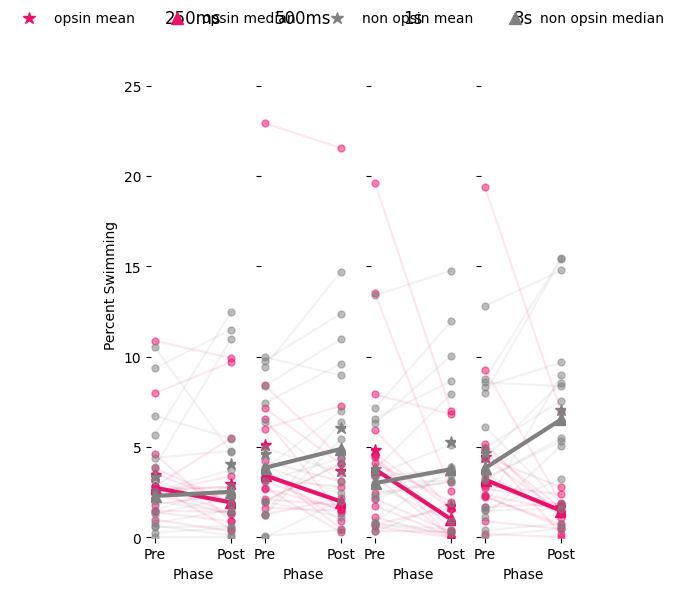


Wilcoxon Test Results Summary:
250ms, opsin: stat=44, p=0.231201, n=16
250ms, non opsin: stat=41, p=0.280531, n=16
500ms, opsin: stat=21, p=0.013092, n=16
500ms, non opsin: stat=29, p=0.044312, n=16
1s, opsin: stat=7, p=0.000580, n=16
1s, non opsin: stat=16, p=0.010254, n=15
3s, opsin: stat=1, p=0.000061, n=16
3s, non opsin: stat=15, p=0.004181, n=16

Exported summary workbook to:
C:\Maha\DATA\behaviour_analysis\percent_swimming_summary.xlsx


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, sem
import numpy as np

# Load the Excel file
file_path = r'C:\Maha\DATA\behaviour_analysis\181122\combined_percent_swimming.xlsx'
data = pd.read_excel(file_path)

# Compute the median for each Well_ID × stim_duration × Condition for pre/post
results_df = (
    data.groupby(['Well_ID', 'stim_duration', 'Condition'], as_index=False)
        .agg(pre_percent_swimming=('pre_percent_swimming', 'median'),
             post_percent_swimming=('post_percent_swimming', 'median'))
)

# -------------------- enforce plotting order --------------------
DESIRED_ORDER = ['250ms', '500ms', '1s', '3s']

def to_label(v):
    s = str(v).strip().lower()
    if s.endswith('ms'):
        try:
            ms = float(s.replace('ms',''))
            if abs(ms-250) < 50:  return '250ms'
            if abs(ms-500) < 50:  return '500ms'
            if abs(ms-1000)< 100: return '1s'
            if abs(ms-3000)< 200: return '3s'
            return f'{int(round(ms))}ms'
        except:
            return s
    if s.endswith('s'):
        try:
            sec = float(s.replace('s',''))
            if abs(sec-0.25) < 0.05: return '250ms'
            if abs(sec-0.5)  < 0.05: return '500ms'
            if abs(sec-1.0)  < 0.05: return '1s'
            if abs(sec-3.0)  < 0.1:  return '3s'
            return f'{sec:g}s'
        except:
            return s
    try:
        x = float(s)
        if x >= 10:
            if abs(x-250)  < 50:  return '250ms'
            if abs(x-500)  < 50:  return '500ms'
            if abs(x-1000) < 100: return '1s'
            if abs(x-3000) < 200: return '3s'
            return f'{int(round(x))}ms'
        if abs(x-0.25) < 0.05: return '250ms'
        if abs(x-0.5)  < 0.05: return '500ms'
        if abs(x-1.0)  < 0.05: return '1s'
        if abs(x-3.0)  < 0.1:  return '3s'
        return f'{x:g}s'
    except:
        return s

results_df['stim_label'] = results_df['stim_duration'].apply(to_label)
labels_present = [lab for lab in DESIRED_ORDER if lab in results_df['stim_label'].unique()]
if not labels_present:
    raise SystemExit("None of the desired stim durations (250ms, 500ms, 1s, 3s) found in data.")
results_df['stim_label'] = pd.Categorical(results_df['stim_label'], categories=labels_present, ordered=True)

# -------------------- PLOTTING (unchanged look) --------------------
color_mapping = {'opsin': '#ea116a', 'non opsin': 'grey'}
alpha_value_lines = 0.1
alpha_value_dots = 0.50

n = len(labels_present)
fig, axes = plt.subplots(
    nrows=1, ncols=n, figsize=(1.2 * n, 5.8),
    sharey=True, constrained_layout=True
)
if n == 1:
    axes = [axes]

wilcoxon_results = {}

for i, stim_label in enumerate(labels_present):
    ax = axes[i]
    subset_df = results_df[results_df['stim_label'] == stim_label]

    for condition, color in color_mapping.items():
        sub = subset_df[subset_df['Condition'] == condition]
        for _, row in sub.iterrows():
            ax.plot([0, 1],
                    [row['pre_percent_swimming'], row['post_percent_swimming']],
                    color=color, alpha=alpha_value_lines, linewidth=1.5)
            ax.plot([0, 1],
                    [row['pre_percent_swimming'], row['post_percent_swimming']],
                    marker='o', linestyle='None', color=color, alpha=alpha_value_dots, markersize=5)

        if not sub.empty:
            pre_mean  = sub['pre_percent_swimming'].mean()
            post_mean = sub['post_percent_swimming'].mean()
            pre_med   = sub['pre_percent_swimming'].median()
            post_med  = sub['post_percent_swimming'].median()

            ax.plot([0, 1], [pre_mean, post_mean], marker='*', linestyle='None',
                    color=color, markersize=9, label=f'{condition} mean')
            ax.plot([0, 1], [pre_med, post_med], marker='^', linestyle='None',
                    color=color, markersize=8, label=f'{condition} median')
            ax.plot([0, 1], [pre_med, post_med], color=color, linewidth=3)

    for condition in color_mapping.keys():
        sub = subset_df[subset_df['Condition'] == condition].dropna(
            subset=['pre_percent_swimming', 'post_percent_swimming']
        )
        if len(sub) > 1:
            stat, p_value = wilcoxon(sub['pre_percent_swimming'], sub['post_percent_swimming'])
            wilcoxon_results[(stim_label, condition)] = (stat, p_value, len(sub))
            print(f"{stim_label}, {condition} — Wilcoxon: stat={stat:.3g}, p={p_value:.6f}")
        else:
            print(f"{stim_label}, {condition} — not enough pairs for Wilcoxon.")

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_xlabel('Phase')
    if i == 0:
        ax.set_ylabel('Percent Swimming')
    ax.set_title(stim_label)
    ax.set_ylim(-0.02, 28)
    for spine in ax.spines.values():
        spine.set_visible(False)

handles, labels = axes[-1].get_legend_handles_labels()
dedup = dict(zip(labels, handles))
fig.legend(dedup.values(), dedup.keys(), loc='upper center', ncols=4, frameon=False)

save_path = r"C:\Maha\DATA\behaviour_analysis\figures_new\pre_post_percent_swimming_side_by_side_ordered.svg"
plt.savefig(save_path, format='svg')
print("Saved SVG to:", save_path)
plt.show()

print("\nWilcoxon Test Results Summary:")
for (stim, cond), (stat, p, n_) in wilcoxon_results.items():
    print(f"{stim}, {cond}: stat={stat:.3g}, p={p:.6f}, n={n_}")

# -------------------- EXCEL EXPORT: detailed + stars + readable --------------------

from scipy.stats import sem
import pandas as pd
import numpy as np

def summarize_block(df, value_col, label):
    # adopt future default & silence warning by setting observed=True
    g = df.groupby(['Condition', 'stim_label'], observed=True)[value_col]
    out = g.agg(
        mean='mean',
        median='median',
        std='std',
        sem=lambda x: sem(pd.to_numeric(x, errors='coerce').dropna()),
        q1 =lambda x: pd.to_numeric(x, errors='coerce').dropna().quantile(0.25, interpolation='midpoint'),
        q3 =lambda x: pd.to_numeric(x, errors='coerce').dropna().quantile(0.75, interpolation='midpoint'),
        n='count'
    ).reset_index()
    out['IQR'] = out['q3'] - out['q1']
    out['Measure'] = label
    # nice column order
    out = out[['Condition','stim_label','Measure','mean','median','std','sem','q1','q3','IQR','n']]
    return out

# compute delta first (Post–Pre)
results_df['delta_percent_swimming'] = results_df['post_percent_swimming'] - results_df['pre_percent_swimming']

# build the detailed tables using .agg (no KeyError now)
detailed_pre   = summarize_block(results_df, 'pre_percent_swimming',  'Pre')
detailed_post  = summarize_block(results_df, 'post_percent_swimming', 'Post')
detailed_delta = summarize_block(results_df, 'delta_percent_swimming','Delta (Post–Pre)')

detailed_all = pd.concat([detailed_pre, detailed_post, detailed_delta], ignore_index=True)



# Wilcoxon table with stars
def p_to_stars(p):
    if pd.isna(p): return 'NA'
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'

wilcox_rows = []
for (stim, cond), (stat, p, n_) in wilcoxon_results.items():
    wilcox_rows.append({
        'stim_label': stim,
        'Condition': cond,
        'n_pairs': n_,
        'Wilcoxon_stat': stat,
        'p_value': p,
        'signif': p_to_stars(p)
    })
wilcoxon_table = pd.DataFrame(wilcox_rows).sort_values(['stim_label', 'Condition'])

# Readable sheet: concise, legend-ready lines (with std included)
def short_line(series, prefix, decimals=2):
    s = pd.to_numeric(series, errors='coerce').dropna()
    if s.empty:
        return f"{prefix}: n=0"
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    return (f"{prefix}: n={len(s)}, "
            f"mean={s.mean():.{decimals}f}, "
            f"median={s.median():.{decimals}f}, "
            f"std={s.std():.{decimals}f}, "
            f"SEM={sem(s):.{decimals}f}, "
            f"IQR={q1:.{decimals}f}–{q3:.{decimals}f}")

readable_rows = []
for stim in labels_present:
    for cond in results_df['Condition'].unique():
        sub = results_df[(results_df['stim_label'] == stim) & (results_df['Condition'] == cond)]
        if sub.empty:
            continue
        line_pre   = short_line(sub['pre_percent_swimming'],  f"{stim}, {cond} Pre")
        line_post  = short_line(sub['post_percent_swimming'], f"{stim}, {cond} Post")
        line_delta = short_line(sub['delta_percent_swimming'],f"{stim}, {cond} Δ(Post–Pre)")
        # add any available Wilcoxon for context
        stat, pval, n_ = wilcoxon_results.get((stim, cond), (np.nan, np.nan, 0))
        line_w = f"{stim}, {cond} Wilcoxon: n={n_}, p={pval:.4f} ({p_to_stars(pval)})" if n_ > 0 else f"{stim}, {cond} Wilcoxon: n=0"
        readable_rows += [
            {'stim_label': stim, 'Condition': cond, 'Summary': line_pre},
            {'stim_label': stim, 'Condition': cond, 'Summary': line_post},
            {'stim_label': stim, 'Condition': cond, 'Summary': line_delta},
            {'stim_label': stim, 'Condition': cond, 'Summary': line_w},
        ]

readable_sheet = pd.DataFrame(readable_rows)

# Save all to Excel
output_xlsx = r"C:\Maha\DATA\behaviour_analysis\percent_swimming_summary.xlsx"
with pd.ExcelWriter(output_xlsx) as writer:
    # raw per-well medians & delta
    results_df[['Well_ID','Condition','stim_label','pre_percent_swimming','post_percent_swimming','delta_percent_swimming']].to_excel(
        writer, sheet_name='Merged_Medians', index=False
    )
    # detailed stats
    detailed_all.to_excel(writer, sheet_name='Summary_Stats', index=False)
    # wilcoxon with stars
    wilcoxon_table.to_excel(writer, sheet_name='Wilcoxon_Tests', index=False)
    # legend-ready text
    readable_sheet.to_excel(writer, sheet_name='Readable', index=False)

print(f"\nExported summary workbook to:\n{output_xlsx}")
